In [ ]:
# Cell 1 — Install / upgrade packages (most are preinstalled but run just in case)
!pip install --upgrade pip >/dev/null
!pip install -q scikit-learn pandas matplotlib joblib


In [ ]:
# Robust DATA loading cell for Colab:
# - Tries to mount Google Drive and instructs you how to complete auth.
# - If mount fails, falls back to interactive upload (files.upload()).

from google.colab import drive, files
import os
import zipfile
import pandas as pd
from pathlib import Path
import shutil
import sys
import time

def load_csv_from_path(p):
    # support both csv and zip containing a single csv
    p = Path(p)
    if not p.exists():
        raise FileNotFoundError(f"File not found: {p}")
    if p.suffix.lower() == ".zip":
        with zipfile.ZipFile(p, 'r') as z:
            csvs = [f for f in z.namelist() if f.lower().endswith('.csv')]
            if not csvs:
                raise RuntimeError("No CSV file found inside ZIP.")
            with z.open(csvs[0]) as f:
                return pd.read_csv(f)
    else:
        return pd.read_csv(p)

DATA_PATH = None
print("Attempting to mount Google Drive. Follow the link that appears and complete the auth flow.")
try:
    drive.mount('/content/drive')
    # if mount succeeded, ask for path or try a default location
    # Common locations: /content/drive/MyDrive/houseprice/data.csv
    default_guess = "/content/drive/MyDrive/houseprice/data.csv"
    if os.path.exists(default_guess):
        DATA_PATH = default_guess
        print("Found dataset at default:", DATA_PATH)
    else:
        print("Drive mounted. Please set DATA_PATH to your file path in Drive, for example:")
        print("  DATA_PATH = '/content/drive/MyDrive/houseprice/data.csv'")
        # Optionally list top-level MyDrive to help user
        try:
            print("\nTop files in /content/drive/MyDrive (first 50):")
            print(os.listdir("/content/drive/MyDrive")[:50])
        except Exception as e:
            print("Could not list MyDrive:", e)
except Exception as e:
    print("Drive mount failed with error:", repr(e))
    print("\nFalling back to interactive upload. Use the file selector to upload data.csv or houseprice.zip.")
    uploaded = files.upload()
    # pick the first uploaded file
    if uploaded:
        uploaded_fn = next(iter(uploaded.keys()))
        DATA_PATH = f"/content/{uploaded_fn}"
        print("Uploaded file saved to:", DATA_PATH)
    else:
        print("No file uploaded. Please upload a file or retry mounting Drive.")
        raise SystemExit("No data source available.")

# At this point, DATA_PATH should be set (either Drive or uploaded file).
print("\nDATA_PATH set to:", DATA_PATH)
# Try to load the CSV (or csv inside zip)
try:
    df = load_csv_from_path(DATA_PATH)
    print("Loaded dataset shape:", df.shape)
    display(df.head())
except Exception as e:
    print("Failed to load DATA_PATH:", e)
    print("If the dataset is inside a folder in Drive, update DATA_PATH to the exact path,")
    print("or upload the CSV/ZIP via the left Files pane or the upload widget.")
    raise


Attempting to mount Google Drive. Follow the link that appears and complete the auth flow.
Drive mount failed with error: MessageError('Error: credential propagation was unsuccessful')

Falling back to interactive upload. Use the file selector to upload data.csv or houseprice.zip.


Saving houseprice.zip to houseprice.zip
Uploaded file saved to: /content/houseprice.zip

DATA_PATH set to: /content/houseprice.zip
Loaded dataset shape: (4600, 18)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
# Cell A — Ensure df is available (or load from DATA_PATH)
import os
from pathlib import Path
import pandas as pd
import zipfile

# If df already exists in notebook, this cell leaves it alone.
if 'df' in globals():
    print("DataFrame 'df' already in memory with shape:", df.shape)
else:
    # Update DATA_PATH if needed (example /content/data.csv or Drive path)
    DATA_PATH = "/content/data.csv"  # <-- edit if your file is elsewhere
    p = Path(DATA_PATH)
    if not p.exists():
        raise FileNotFoundError(f"DATA_PATH not found: {p}. Upload or set correct path.")
    # support zip or csv
    if p.suffix.lower() == ".zip":
        with zipfile.ZipFile(p, 'r') as z:
            csvs = [f for f in z.namelist() if f.lower().endswith('.csv')]
            if not csvs:
                raise RuntimeError("No CSV in ZIP.")
            with z.open(csvs[0]) as f:
                df = pd.read_csv(f)
    else:
        df = pd.read_csv(p)
    print("Loaded df shape:", df.shape)

# Quick check
display(df.head())
print("\nColumns:", df.columns.tolist())


DataFrame 'df' already in memory with shape: (4600, 18)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA



Columns: ['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country']


In [ ]:
# Cell B — Preprocessing & feature engineering (run this next)
import numpy as np

df = df.copy()

# Parse date into year_sold if present
if "date" in df.columns:
    df["date"] = pd.to_datetime(df["date"], errors="coerce")
    df["year_sold"] = df["date"].dt.year.fillna(2014).astype(int)
else:
    df["year_sold"] = 2014

# Basic engineered features
if "yr_built" in df.columns:
    df["house_age"] = df["year_sold"] - df["yr_built"].fillna(df["year_sold"])
else:
    df["house_age"] = 0

df["was_renovated"] = (df.get("yr_renovated", 0).fillna(0) > 0).astype(int)

# Drop obvious identifier / high-cardinality columns (edit if you want to keep some)
for c in ["id","street","country","statezip","date"]:
    if c in df.columns:
        df.drop(columns=c, inplace=True)

# Numeric feature list (only keep those present)
numeric_features = [
    "bedrooms","bathrooms","sqft_living","sqft_lot","floors",
    "waterfront","view","condition","sqft_above","sqft_basement",
    "yr_built","yr_renovated","house_age","was_renovated"
]
numeric_features = [c for c in numeric_features if c in df.columns]

# Reduce 'city' to top categories (optional)
categorical_features = []
if "city" in df.columns:
    top_cities = df["city"].value_counts().nlargest(10).index.tolist()
    df["city_reduced"] = df["city"].where(df["city"].isin(top_cities), other="Other")
    categorical_features = ["city_reduced"]

features = numeric_features + categorical_features
print("Using features:", features)

# Ensure target exists and drop missing
if "price" not in df.columns:
    raise RuntimeError("Target column 'price' not found.")
df = df.dropna(subset=["price"])
X = df[features].copy()
y = df["price"].values
print("Prepared X shape:", X.shape, "y length:", len(y))


Using features: ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'house_age', 'was_renovated', 'city_reduced']
Prepared X shape: (4600, 15) y length: 4600


In [ ]:
# Cell C — Train-test split and preprocessing pipelines (FIXED for new sklearn)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# FIXED OneHotEncoder for sklearn >=1.4
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
], remainder="drop")

print("Preprocessor built successfully.")


Train shape: (3680, 15) Test shape: (920, 15)
Preprocessor built successfully.


In [ ]:
# Cell D — Train models, evaluate and save best model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np
import joblib

models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=200, random_state=42)
}

results = {}
trained = {}

for name, mdl in models.items():
    pipe = Pipeline([("preprocessor", preprocessor), ("model", mdl)])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)
    cv = cross_val_score(pipe, X_train, y_train, cv=5, scoring="r2", n_jobs=-1)
    results[name] = {"rmse": rmse, "r2": r2, "cv_r2_mean": cv.mean()}
    trained[name] = pipe
    print(f"{name}: RMSE={rmse:.2f}, R2={r2:.4f}, CV R2 mean={cv.mean():.4f}")

# Create results DataFrame
import pandas as pd
res_df = pd.DataFrame(results).T.sort_values(by="r2", ascending=False)
display(res_df)

# Save best pipeline
best_name = res_df.index[0]
best_pipe = trained[best_name]
save_path = "/content/best_house_model.joblib"  # change to Drive path if desired
joblib.dump(best_pipe, save_path)
print(f"Best model: {best_name} saved to {save_path}")


LinearRegression: RMSE=990756.36, R2=0.0375, CV R2 mean=0.5943
RandomForest: RMSE=992166.74, R2=0.0348, CV R2 mean=0.5316
GradientBoosting: RMSE=988334.98, R2=0.0422, CV R2 mean=0.5020


,rmse,r2,cv_r2_mean
GradientBoosting,988334.977743,0.042203,0.502027
LinearRegression,990756.360576,0.037504,0.594327
RandomForest,992166.744140,0.034762,0.531605


Best model: GradientBoosting saved to /content/best_house_model.joblib


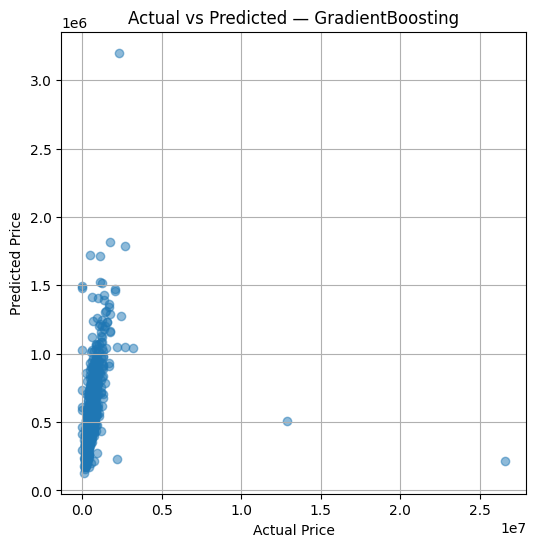

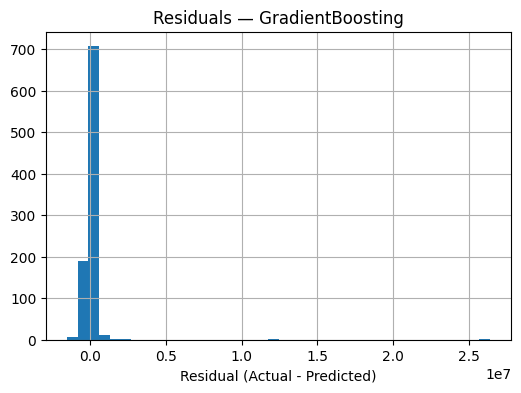

,0
sqft_living,0.624576
sqft_above,0.055568
view,0.046437
sqft_lot,0.030094
yr_built,0.028662
bathrooms,0.025636
sqft_basement,0.025350
house_age,0.024819
city_reduced_Seattle,0.023287
city_reduced_Bellevue,0.022808


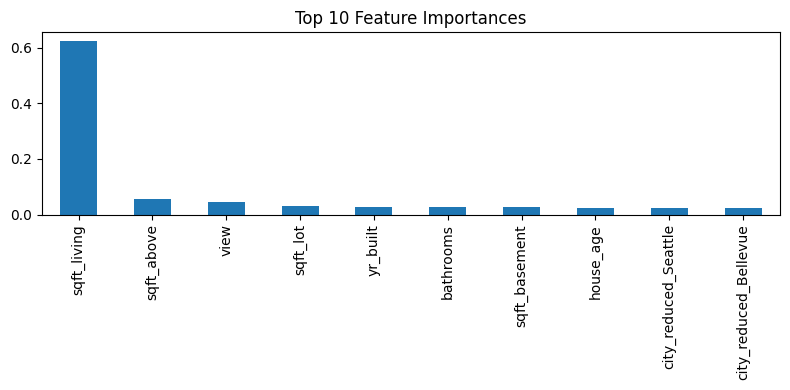

In [ ]:
# Cell E — Diagnostics: actual vs predicted, residuals, feature importances (if tree)
import matplotlib.pyplot as plt
import numpy as np

best_preds = best_pipe.predict(X_test)

# Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, best_preds, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(f"Actual vs Predicted — {best_name}")
plt.grid(True)
plt.show()

# Residuals
resid = y_test - best_preds
plt.figure(figsize=(6,4))
plt.hist(resid, bins=40)
plt.xlabel("Residual (Actual - Predicted)")
plt.title(f"Residuals — {best_name}")
plt.grid(True)
plt.show()

# Feature importances for tree models
if best_name in ("RandomForest", "GradientBoosting"):
    pre = best_pipe.named_steps["preprocessor"]
    feature_names = list(pre.transformers_[0][2])
    if categorical_features:
        ohe = pre.transformers_[1][1].named_steps["ohe"]
        cat_names = list(ohe.get_feature_names_out(categorical_features))
        feature_names += cat_names
    importances = best_pipe.named_steps["model"].feature_importances_
    fi = pd.Series(importances, index=feature_names).sort_values(ascending=False)
    display(fi.head(15))
    plt.figure(figsize=(8,4))
    fi.head(10).plot(kind="bar")
    plt.title("Top 10 Feature Importances")
    plt.tight_layout()
    plt.show()
else:
    print("Best model is not tree-based; no feature importances to show.")


In [ ]:
from google.colab import files
files.download('/content/best_house_model.joblib')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>